Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [112]:
NAME = "Jing Wang"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

### Option 2 - Using Yahoo Finance `fix_yahoo_finance` library

In [113]:
#!pip install yfinance
#! pip install yahoofinancials
#import pandas as pd
#import yfinance as yf
#import yahoofinancials
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
#import yahoofinancials as yfs
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()


In [115]:
#60 Months Amazon Adj Close data
Amazon = yf.download('AMZN',start='2015-01-01',end='2019-12-31')['Adj Close']##, start = start
Amazon=pd.DataFrame(Amazon)
Amazon=Amazon.rename(columns={"Adj Close": "Amazon"})
#Resample the data to get prices for the end of the business month.
Amazon = Amazon.resample('BM').mean()
Amazon.head(10)


[*********************100%***********************]  1 of 1 completed


,Amazon
Date,
2015-01-30,302.747501
2015-02-27,375.745263
2015-03-31,375.321361
2015-04-30,394.212857
2015-05-29,426.927501
2015-06-30,432.599548
2015-07-31,478.709095
2015-08-31,518.464765
2015-09-30,520.955718


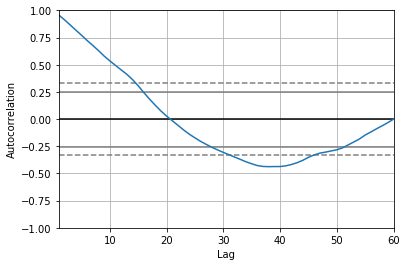

In [116]:
autocorrelation_plot(Amazon)
#Explanation: In month 1 - month 14, there is positive correlation between the Amazon stock price and time
# between month 14 - month 31, there is no correlation between Amazon stock price and time
#there is significant values, show negative correlation between the Amazon stock price and time
# between month 31 - month 45, Later on, there is no correlation between Amazon stock price and time

In [117]:
AmazonMonth=Amazon
AmazonMonthLater=Amazon.shift(1)
AmazonMonthLater.head(10)

,Amazon
Date,
2015-01-30,NaN
2015-02-27,302.747501
2015-03-31,375.745263
2015-04-30,375.321361
2015-05-29,394.212857
2015-06-30,426.927501
2015-07-31,432.599548
2015-08-31,478.709095
2015-09-30,518.464765


In [118]:
AmazonRtn=AmazonMonth/AmazonMonthLater-1
#Drop Month1 NaN record
AmazonRtn=AmazonRtn.dropna()
AmazonRtn.head()

,Amazon
Date,
2015-02-27,0.241118
2015-03-31,-0.001128
2015-04-30,0.050334
2015-05-29,0.082987
2015-06-30,0.013286


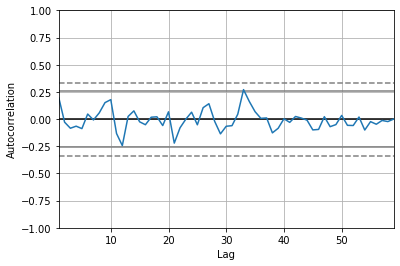

In [119]:
autocorrelation_plot(AmazonRtn)
#Conclusion: there is no correlation between months and Amazon Stock return
#stock return is not related by the time

In [120]:
#60 Months Amazon Adj Close data
Facebook = yf.download('FB',start='2015-01-01',end='2019-12-31')['Adj Close']##, start = start
Facebook=pd.DataFrame(Facebook)
Facebook.head(10)


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2015-01-02,78.449997
2015-01-05,77.190002
2015-01-06,76.150002
2015-01-07,76.150002
2015-01-08,78.180000
2015-01-09,77.739998
2015-01-12,76.720001
2015-01-13,76.449997
2015-01-14,76.279999


In [121]:
Facebook=Facebook.rename(columns={"Adj Close": "Facebook"})

In [122]:
#Resample the data to get prices for the end of the business month.
Facebook = Facebook.resample('BM').mean()
Facebook.head(10)

,Facebook
Date,
2015-01-30,76.721500
2015-02-27,76.951053
2015-03-31,81.013183
2015-04-30,82.091428
2015-05-29,79.420000
2015-06-30,83.283637
2015-07-31,92.055000
2015-08-31,91.778572
2015-09-30,91.446191


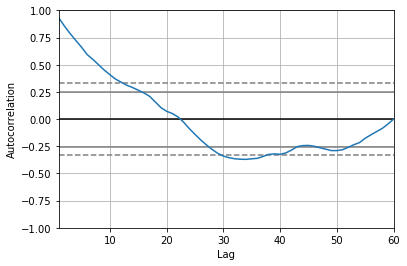

In [123]:
autocorrelation_plot(Facebook)
#Explanation: In month 1 - month 11, there is positive correlation between the Facebook stock price and time
# Later on, there is no correlation between Facebook stock price and time

In [124]:
FacebookMonth=Facebook
FacebookMonthLater=Facebook.shift(1)
FacebookMonthLater.head(10)

,Facebook
Date,
2015-01-30,NaN
2015-02-27,76.721500
2015-03-31,76.951053
2015-04-30,81.013183
2015-05-29,82.091428
2015-06-30,79.420000
2015-07-31,83.283637
2015-08-31,92.055000
2015-09-30,91.778572


In [125]:
#Get the return
FacebookRtn=FacebookMonth/FacebookMonthLater-1
#Drop Month1 NaN record
FacebookRtn=FacebookRtn.dropna()
FacebookRtn.head()

,Facebook
Date,
2015-02-27,0.002992
2015-03-31,0.052788
2015-04-30,0.013310
2015-05-29,-0.032542
2015-06-30,0.048648


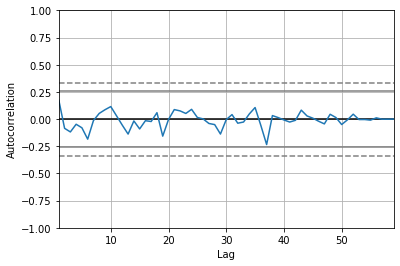

In [126]:
autocorrelation_plot(FacebookRtn)
#Conclusion: there is no correlation between months and Facebook Stock return
#stock return is not related by the time

In [127]:
#60 Months IBM Adj Close data
IBM = yf.download('IBM',start='2015-01-01',end='2019-12-31')['Adj Close']##, start = start
IBM=pd.DataFrame(IBM)
IBM.head(10)


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2015-01-02,129.241516
2015-01-05,127.207932
2015-01-06,124.464600
2015-01-07,123.651100
2015-01-08,126.338654
2015-01-09,126.888924
2015-01-12,124.759621
2015-01-13,125.054688
2015-01-14,124.249229


In [128]:
IBM=IBM.rename(columns={"Adj Close": "IBM"})

IBM = IBM.resample('BM').mean()

IBM.head(10)


,IBM
Date,
2015-01-30,124.474512
2015-02-27,128.317320
2015-03-31,128.339722
2015-04-30,132.682826
2015-05-29,140.080674
2015-06-30,136.291419
2015-07-31,134.339662
2015-08-31,125.450652
2015-09-30,119.513989


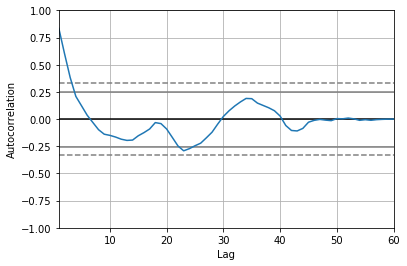

In [129]:
# Autocorrelation plot for IBM
autocorrelation_plot(IBM)
#Explanation: In month 1 - month 2, there is weak positive correlation between the IBM stock price and time
# Later on, there is no correlation between Facebook stock price and time

In [130]:
IBMMonth=IBM
IBMMonthLater=IBM.shift(1)
IBMMonthLater.head(10)

,IBM
Date,
2015-01-30,NaN
2015-02-27,124.474512
2015-03-31,128.317320
2015-04-30,128.339722
2015-05-29,132.682826
2015-06-30,140.080674
2015-07-31,136.291419
2015-08-31,134.339662
2015-09-30,125.450652


In [131]:
#Get the return
IBMRtn=IBMMonth/IBMMonthLater-1
#Drop Month1 NaN record
IBMRtn=IBMRtn.dropna()
IBMRtn.head()


,IBM
Date,
2015-02-27,0.030872
2015-03-31,0.000175
2015-04-30,0.033841
2015-05-29,0.055756
2015-06-30,-0.027051


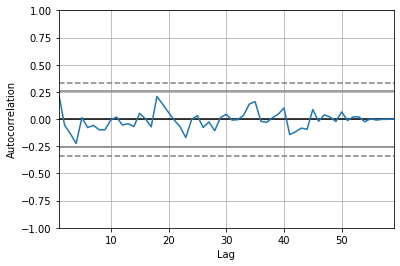

In [132]:
autocorrelation_plot(IBMRtn)
#Conclusion: there is no correlation between time and IBM Stock return
#stock return is not related by the time

In [133]:
#60 Months Amazon Adj Close data
MMM = yf.download('MMM',start='2015-01-01',end='2019-12-31')['Adj Close']##, start = start
MMM = pd.DataFrame(MMM)
MMM=MMM.rename(columns={"Adj Close": "MMM"})
#Resample stock price to Business month end 
MMM = MMM.resample('BM').mean()
MMM.head(10)


[*********************100%***********************]  1 of 1 completed


,MMM
Date,
2015-01-30,140.520189
2015-02-27,145.012357
2015-03-31,144.030227
2015-04-30,142.083753
2015-05-29,140.182536
2015-06-30,138.310354
2015-07-31,135.002413
2015-08-31,128.621459
2015-09-30,124.169882


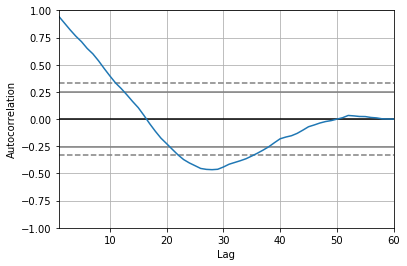

In [134]:
autocorrelation_plot(MMM)
#Explanation: In month 1 - month 11, there is positive correlation between the MMM stock price and time
# between month 11 - month 12, there is no correlation between MMM stock price and time
# between month 21 - month 34, there is negative correlation between the MMM stock price and time
# Later on, there is no correlation

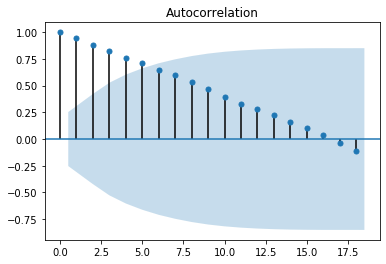

In [137]:

plot_acf(MMM)
#plot_acf(MMM)
plt.show()

In [ ]:
MMMMonth=MMM
MMMMonthLater=MMM.shift(1)
MMMMonthLater.head(10)


In [149]:
#Get the return
MMMRtn=MMMMonth/MMMMonthLater-1
#Drop Month1 NaN record
MMMRtn=MMMRtn.dropna()
MMMRtn.head()

,MMM
Date,
2015-02-27,0.031968
2015-03-31,-0.006773
2015-04-30,-0.013514
2015-05-29,-0.013381
2015-06-30,-0.013355


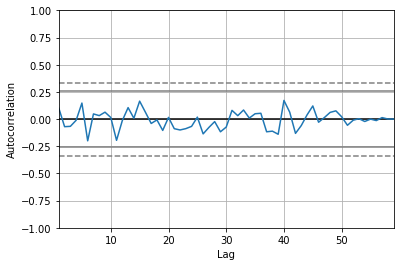

In [138]:
autocorrelation_plot(MMMRtn)
plt.show()
#Conclusion: there is no correlation between months and return
#stock return is not related by the time

In [144]:
#Combine 4 stocks return
All_FourStocksRtn=pd.concat([MMMRtn,IBMRtn,FacebookRtn,AmazonRtn],axis=1)
All_FourStocksRtn=pd.DataFrame(All_FourStocksRtn)

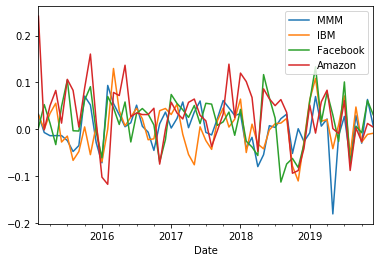

In [145]:
All_FourStocksRtn.plot()
plt.show()

In [146]:
All_FourStocksRtn.corr()

,MMM,IBM,Facebook,Amazon
MMM,1.000000,0.498514,0.300878,0.234353
IBM,0.498514,1.000000,0.256861,0.280279
Facebook,0.300878,0.256861,1.000000,0.382452
Amazon,0.234353,0.280279,0.382452,1.000000


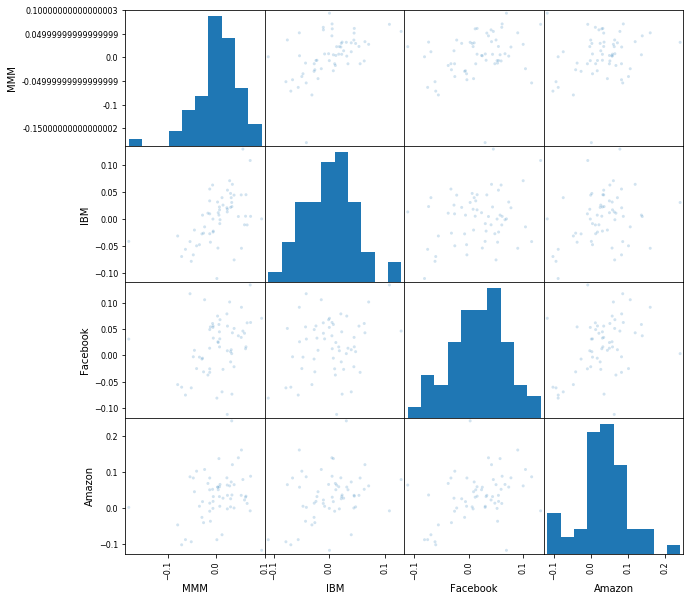

In [148]:
#Show Scatter Matrix for all four stocks return
scatter_matrix(All_FourStocksRtn, alpha=0.2, figsize=(10, 10))
plt.show() 
## They all have positive correlation with each other
## Stock MMM has weak correlated to IBM, Facebook, Amazon
## IBM has stronger correlated with IBM
## Amazon has stronger correlated with Facebook